# Analyzing Public Sentiment on the #DeleteBoltApp Movement

[1. Business Understanding](#1.-Business-Understanding) </br>
[1.1 Business Description](#1.1-Business-Description) </br>
[1.2 Problem Statement](#1.2-Problem-Statement) </br>
[1.3 Main Objective](#1.3-Main-Objective) </br>
[1.4 Specific Objectives](#1.4-Specific-Objectives) </br>
[2. Importing Libraries And Warnings](#2.-Importing-Libraries-And-Warnings) </br>
[3. Data Understanding](#3.-Data-Understanding) </br>
[3.1 Information about the columns](#3.1-Information-About-The-Columns)</br>
[4. Data Preparation](#4.-Data-Preparation) </br>
[4.1 Visualizing Before Cleaning](#4.1-Visualizing-Before-Cleaning) </br>
[4.2 Renaming The Columns](#4.2-Renaming-The-Columns) </br>
[4.3 Missing Values](#4.3-Missing-Values) </br>
[4.4 Duplicates](#4.4-Duplicates) </br>
[4.5 Place Holders](#4.5-Place-Holders) </br>
[4.6 White Space](#4.6-White-Space) </br>
[4.7 Visualizing After Cleaning](#4.7-Visualizing-After-Cleaning) </br>
[5. EDA](#5.-EDA) </br>
[6. Data Preprocessing And Feature Engineering](#6.-Data-Preprocessing-And-Feature-Engineering) </br>
[7. Data Modelling](#7.-Data-Modelling) </br>
[8. Evaluation](#8.-Evaluation) </br>
[9. Conclusions](#9.-Conclusions) </br>
[10. Recommendations](#10.-Recommendations) </br>
[11. Challenges](#11.-Challenges)

# 1. Business Understanding

## 1.1 Business Description

This study will collect data from X (formerly Twitter) by harvesting tweets related to the #DeleteBoltApp and #DeleteBolt hashtags using a Python-based X scraper. The dataset will also include press releases shared by Bolt on the platform in response to the crisis. A purposive sampling approach will be used to ensure the collected data is relevant to the study's objectives.

To facilitate data collection, a Twitter scraper implemented in Python will be utilized as the primary tool. The hashtags #DeleteBoltApp and #DeleteBolt will be the main keywords to extract tweets related to the protest. Purposive sampling is chosen because it focuses on cases rich in data, aligning with the qualitative research principles outlined by Lambert and Lambert (2012). Prior research by Chen, Duan, and Yang (2021) highlights Twitter as a valuable source of social media data for qualitative analysis.

### Using a Python scraper offers several advantages:

    Access to Real-Time, Publicly Available Data – Twitter provides a wealth of real-time data reflecting diverse voices, sentiments, and interactions around the protest.

    Scalability and Efficiency – Python-based tools like Tweepy enable efficient retrieval of tweets based on search parameters, mentions, retweets, and replies, ensuring a comprehensive dataset.

    Automation and Flexibility – Python scripts can automate data collection, filter tweets based on engagement metrics, and store structured data in Excel or other analysis-ready formats (Wisdom & Gupta, 2016).

### Precedent for Twitter-Based Research

Harvesting Twitter data has been widely used in communication research. For instance, Jiani (2023) successfully analyzed organizational crisis communication using X data, including corporate responses, public comments, and user interactions. Similarly, Zhang, Hun, and Park (2022) demonstrated how Twitter enables unobtrusive examination of human behavior.
Challenges of Python-Based Web Scraping

### Despite its advantages, Python-based scraping presents several challenges:

    Technical and Infrastructure Constraints – Dynamic content, API limitations, and platform design changes can hinder data retrieval (Hughes, Chua, & Hutchings, 2021).

    Rate Limits and Scalability Issues – Twitter imposes API rate limits, restricting the volume of data collected at a given time (Dogucu & Çetinkaya-Rundel, 2021).

    Ethical and Legal Considerations – Data privacy, informed consent, and platform terms of service must be carefully managed (Krotov, Johnson, & Silva, 2020).

#### Despite these limitations, the study will implement best practices in ethical data collection and utilize API-based scraping methods where possible to ensure compliance with Twitter’s policies.

# 2. Importing Libraries And Warnings

In [33]:
import re
import nltk
import json
import warnings
%matplotlib inline
import pandas as pd
import seaborn as sns
from textblob import TextBlob
#from ntscraper import Nitter
from nltk import word_tokenize
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
warnings.filterwarnings("ignore")
from nltk.corpus import stopwords
from gensim.models import Word2Vec
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# 3. Data Understanding

In [34]:
# # Define search terms
# terms = ["DeleteBoltApp", "DeleteBolt"]

# # Initialize scraper
# scraper = Nitter()

# # Fetch tweets
# results = scraper.get_tweets(terms, mode='term', number=100)

# # Save raw results to CSV
# if results:
#     pd.DataFrame(results).to_csv("DeleteBolt_Tweets_Raw.csv", index=False)

In [35]:
# df = pd.DataFrame(results)
# print(df.head())

In [36]:
# if results:
#     with open("DeleteBolt_Tweets.json", "w", encoding="utf-8") as f:
#         json.dump(results, f, ensure_ascii=False, indent=4)

In [37]:
# if results:
#     pd.DataFrame(results).to_excel("DeleteBolt_Tweets.xlsx", index=False)

In [38]:
# Load JSON file
with open("DeleteBolt_Tweets.json", "r") as f:
    data = json.load(f)

# Normalize the tweets field
df = pd.json_normalize(data, record_path=["tweets"])

# Display the first few rows
print(df.head())

                                                              link  \
0        https://twitter.com/gapae254/status/1716527034636120163#m   
1  https://twitter.com/musyimijoseph_/status/1683784052833128448#m   
2       https://twitter.com/Felinsky1/status/1669206058034659330#m   
3  https://twitter.com/GovOparanyaFan/status/1668997202268618757#m   
4     https://twitter.com/Kevoh_Spice/status/1668888059880828930#m   

                                                                                                          text  \
0                                                                   You people still use Bolt?  #DeleteBoltApp   
1                                                                             Delete Bolt App ! #deleteboltapp   
2                                                                             Me: Amerix said.  #DeleteBoltApp   
3  He said tiktok is for pussified men, I deleted the app.. He said I deserve better; done with #DeleteBoltApp   
4        

In [39]:
# Load the JSON file
with open("DeleteBolt_Tweets.json", "r") as file:
    data = json.load(file)

# Check the structure
print(type(data))  # Should be list or dict
print(data[:2])    # Print the first two elements

<class 'list'>
[{'tweets': [{'link': 'https://twitter.com/gapae254/status/1716527034636120163#m', 'text': 'You people still use Bolt?  #DeleteBoltApp', 'user': {'name': 'Thesage254', 'username': '@gapae254', 'profile_id': '1743544368898646016', 'avatar': 'https://pbs.twimg.com/profile_images/1743544368898646016/yfhUfAz9_bigger.jpg'}, 'date': 'Oct 23, 2023 · 6:48 PM UTC', 'is-retweet': False, 'is-pinned': False, 'external-link': '', 'replying-to': [], 'quoted-post': {}, 'stats': {'comments': 0, 'retweets': 0, 'quotes': 0, 'likes': 0}, 'pictures': [], 'videos': [], 'gifs': []}, {'link': 'https://twitter.com/musyimijoseph_/status/1683784052833128448#m', 'text': 'Delete Bolt App ! #deleteboltapp', 'user': {'name': 'Musyimi Joseph', 'username': '@musyimijoseph_', 'profile_id': '1631931334355550208', 'avatar': 'https://pbs.twimg.com/profile_images/1631931334355550208/mBp_ahbI_bigger.jpg'}, 'date': 'Jul 25, 2023 · 10:19 AM UTC', 'is-retweet': False, 'is-pinned': False, 'external-link': '', 'r

In [40]:
# Load the JSON file
with open("DeleteBolt_Tweets.json", "r") as file:
    data = json.load(file)

# Since `data` is a list, extract tweets from each dictionary
tweets_list = []
for entry in data:
    tweets_list.extend(entry.get("tweets", []))  # Extract tweets from each entry

# Normalize the nested structure into a DataFrame
df = pd.json_normalize(tweets_list)

# Select only the required columns
data = df[["link", "text", "user.username", "date", "stats.retweets", "stats.likes", "stats.comments"]]

# Rename columns for better readability
data.columns = ["Tweet Link", "Tweet Text", "Username", "Date", "Retweets", "Likes", "Comments"]

# Display the first few rows
print(data)

                                                           Tweet Link  \
0           https://twitter.com/gapae254/status/1716527034636120163#m   
1     https://twitter.com/musyimijoseph_/status/1683784052833128448#m   
2          https://twitter.com/Felinsky1/status/1669206058034659330#m   
3     https://twitter.com/GovOparanyaFan/status/1668997202268618757#m   
4        https://twitter.com/Kevoh_Spice/status/1668888059880828930#m   
..                                                                ...   
126    https://twitter.com/tituskimanthi/status/1439643513222832132#m   
127   https://twitter.com/OnlinePageShop/status/1439619125395984385#m   
128  https://twitter.com/Thepiggeryburg1/status/1439617305827237893#m   
129     https://twitter.com/MukumuFranco/status/1439612539499958278#m   
130     https://twitter.com/d_households/status/1439609805572816897#m   

                                                                                                                           

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131 entries, 0 to 130
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Tweet Link  131 non-null    object
 1   Tweet Text  131 non-null    object
 2   Username    131 non-null    object
 3   Date        131 non-null    object
 4   Retweets    131 non-null    int64 
 5   Likes       131 non-null    int64 
 6   Comments    131 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 7.3+ KB


In [42]:
data.shape

(131, 7)

In [43]:
data.columns

Index(['Tweet Link', 'Tweet Text', 'Username', 'Date', 'Retweets', 'Likes',
       'Comments'],
      dtype='object')

In [44]:
# Show full text

pd.set_option('display.max_colwidth', None)  
print(data["Tweet Text"].head(10))

0                                                                                      You people still use Bolt?  #DeleteBoltApp
1                                                                                                Delete Bolt App ! #deleteboltapp
2                                                                                                Me: Amerix said.  #DeleteBoltApp
3                     He said tiktok is for pussified men, I deleted the app.. He said I deserve better; done with #DeleteBoltApp
4                                                                                                           #DeleteBoltApp, Done.
5                     @Boltapp_ke #deleteboltapp I totally agree the worst service provider app no office no response or feedback
6    Bolt ride is a disaster in waiting trip, you choose to ride cheaply, you get cheap, crappy, unruly service.  #DeleteBoltApp.
7                                                                    This thread shows the

In [45]:
data[["Tweet Text", "Username", "Date"]]

,Tweet Text,Username,Date
0,You people still use Bolt? #DeleteBoltApp,@gapae254,"Oct 23, 2023 · 6:48 PM UTC"
1,Delete Bolt App ! #deleteboltapp,@musyimijoseph_,"Jul 25, 2023 · 10:19 AM UTC"
2,Me: Amerix said. #DeleteBoltApp,@Felinsky1,"Jun 15, 2023 · 4:51 AM UTC"
3,"He said tiktok is for pussified men, I deleted the app.. He said I deserve better; done with #DeleteBoltApp",@GovOparanyaFan,"Jun 14, 2023 · 3:01 PM UTC"
4,"#DeleteBoltApp, Done.",@Kevoh_Spice,"Jun 14, 2023 · 7:48 AM UTC"
...,...,...,...
126,#deletebolt,@tituskimanthi,"Sep 19, 2021 · 5:32 PM UTC"
127,Wash wash done better. Walevi edition lol. Ronaldo #deletebolt #UsikuSacco youtube.com/channel/UCQrGLG-…,@OnlinePageShop,"Sep 19, 2021 · 3:55 PM UTC"
128,How to end your weekend with a good vibe of burger 🍔...... #TOTCHE #OleOut The 5th #UsikuSacco Nick Mwendwa #deletebolt Kenya Police Dave Penalty Chelsea Mendy Ronaldo West Ham De Gea Manchester united,@Thepiggeryburg1,"Sep 19, 2021 · 3:48 PM UTC"
129,Health care or sick care? #NikujaribuTu #deletebolt 5th Follow @Cysmedhub for more.,@MukumuFranco,"Sep 19, 2021 · 3:29 PM UTC"


# 4. Data Cleaning

## 4.1 Duplicates

In [46]:
data.duplicated().sum()

0

## 4.2 Missing Values

In [47]:
data.isna().sum()

Tweet Link    0
Tweet Text    0
Username      0
Date          0
Retweets      0
Likes         0
Comments      0
dtype: int64

## 4.3 Placeholders

In [48]:
# Define a pattern for placeholders
placeholder_pattern = r"[@#$%&,./?'-;!]"

# Identify rows containing placeholders
placeholder_rows = data[data["Tweet Text"].str.contains(placeholder_pattern, na=False)]

# Print only the "Tweet Text" column
print(f"Rows with placeholders:\n{placeholder_rows['Tweet Text']}")

Rows with placeholders:
0                                                                                                                                                                      You people still use Bolt?  #DeleteBoltApp
1                                                                                                                                                                                Delete Bolt App ! #deleteboltapp
2                                                                                                                                                                                Me: Amerix said.  #DeleteBoltApp
3                                                                                                     He said tiktok is for pussified men, I deleted the app.. He said I deserve better; done with #DeleteBoltApp
4                                                                                                                                       

In [49]:
# Remove placeholders from the dataframe
data['Tweet Text'] = data['Tweet Text'].str.replace(placeholder_pattern, '', regex=True)

# Display the cleaned text column
print(data['Tweet Text'])

0                                                                                                                                                             You people still use Bolt  DeleteBoltApp
1                                                                                                                                                                       Delete Bolt App  deleteboltapp
2                                                                                                                                                                        Me Amerix said  DeleteBoltApp
3                                                                                               He said tiktok is for pussified men I deleted the app He said I deserve better done with DeleteBoltApp
4                                                                                                                                                                                   DeleteBoltApp Done
     

## 4.4 White Space

In [50]:
# Checking for white space
df_whitespace = [col for col in data.columns if col.strip() != col]
print("Columns with whitespace:", df_whitespace)

Columns with whitespace: []


## 4.5 Emojis

In [51]:
# Define emoji pattern
emoji_pattern = re.compile("["
    "\U0001F600-\U0001F64F"  
    "\U0001F300-\U0001F5FF" 
    "\U0001F680-\U0001F6FF"
    "\U0001F700-\U0001F77F"  
    "\U0001F780-\U0001F7FF"  
    "\U0001F800-\U0001F8FF"  
    "\U0001F900-\U0001F9FF"  
    "\U0001FA00-\U0001FA6F" 
    "\U0001FA70-\U0001FAFF"  
    "\U00002702-\U000027B0" 
    "\U000024C2-\U0001F251"  
    "]+", flags=re.UNICODE)

# Function to remove emojis
def remove_emojis(text):
    return emoji_pattern.sub(r'', text)

# Apply to the "Tweet Text" column
data["Tweet Text"] = data["Tweet Text"].apply(remove_emojis)

# Display the cleaned text column
print(data['Tweet Text'])

0                                                                                                                                                            You people still use Bolt  DeleteBoltApp
1                                                                                                                                                                      Delete Bolt App  deleteboltapp
2                                                                                                                                                                       Me Amerix said  DeleteBoltApp
3                                                                                              He said tiktok is for pussified men I deleted the app He said I deserve better done with DeleteBoltApp
4                                                                                                                                                                                  DeleteBoltApp Done
          

## 4.6 Date

In [52]:
# Convert "Date" column to datetime format
data["Date"] = pd.to_datetime(data["Date"], format="%b %d, %Y · %I:%M %p UTC")

# Display the updated Date column
print(data[["Date"]].head())

                 Date
0 2023-10-23 18:48:00
1 2023-07-25 10:19:00
2 2023-06-15 04:51:00
3 2023-06-14 15:01:00
4 2023-06-14 07:48:00


## 4.7 Stop Words

In [53]:
# Download NLTK resources if not already downloaded
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /home/muchiri/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/muchiri/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [54]:
"""
Words such as "the, and, of, is etc in the data add little or no value to the data.

Here, the data is tokenized to make it easier to remove the stop words

A list comprehension will be used to omit any token not in stop_words variable below
"""
# Define stop words
stop_words = set(stopwords.words("english"))

# Ensure that tweets are tokenized properly
data["Tweet Text"] = data["Tweet Text"].apply(lambda x: word_tokenize(x) if isinstance(x, str) else x)

# Convert to lowercase and remove stop words
data["Tweet Text"] = data["Tweet Text"].apply(lambda tokens: [w.lower() for w in tokens if w.lower() not in stop_words])

# Show the result
print(data["Tweet Text"])

0                                                                                                                                                         [people, still, use, bolt, deleteboltapp]
1                                                                                                                                                                [delete, bolt, app, deleteboltapp]
2                                                                                                                                                                     [amerix, said, deleteboltapp]
3                                                                                                          [said, tiktok, pussified, men, deleted, app, said, deserve, better, done, deleteboltapp]
4                                                                                                                                                                             [deleteboltapp, done]
                    

## 4.8 Lemmatization

In [55]:
"""
It's better than stemming since it word forms to determine the base or dictionary form rather than chopping off the last part of a sentence
whether it's grammatically correct or not like stemming does
"""
# instantiating lemmatizer
lemmatizer = WordNetLemmatizer()

# function to lemmatize tweet column words
def lemmatize_text(tokens):
    return [lemmatizer.lemmatize(word) for word in tokens]

# displaying the results
data["Tweet Text"] = data["Tweet Text"].apply(lemmatize_text)
data["Tweet Text"]

0                                                                                                                                                         [people, still, use, bolt, deleteboltapp]
1                                                                                                                                                                [delete, bolt, app, deleteboltapp]
2                                                                                                                                                                     [amerix, said, deleteboltapp]
3                                                                                                          [said, tiktok, pussified, men, deleted, app, said, deserve, better, done, deleteboltapp]
4                                                                                                                                                                             [deleteboltapp, done]
                    

# 5. EDA

## 5.1 Univariate Analysis

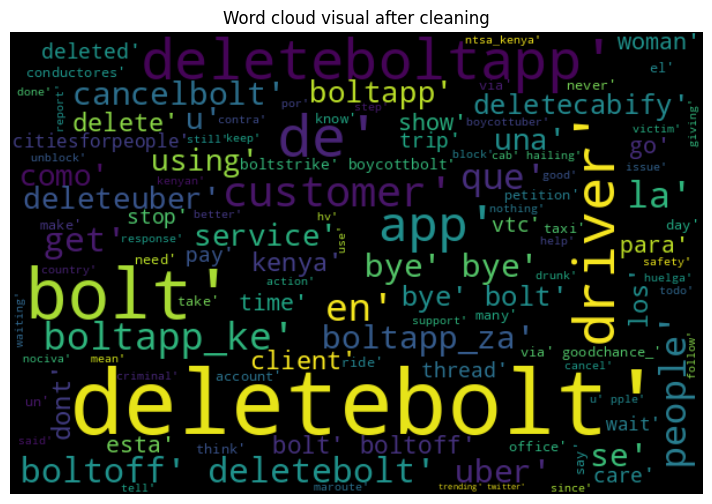

In [56]:
# convert tweet_text values into string to enable plotting of the word cloud
data["Tweet Text"] = data["Tweet Text"].astype(str)

# plot the figure size
plt.figure(figsize = (10, 6))

# generate a word cloud from the data
word_cloud = WordCloud(width = 600, height = 400).generate("".join(data["Tweet Text"]))

# plot
plt.imshow(word_cloud, interpolation = "bilinear")
plt.title("Word cloud visual after cleaning")
plt.axis("off")

# display the wordcloud
plt.show()

In [57]:
# Ensure each tweet is properly split into words
all_words = [word for tweet in data["Tweet Text"] for word in tweet.split()]
word_freq = Counter(all_words)

# Get the top 20 most common words
common_words = word_freq.most_common(20)

# Print each word on a new line
for word, count in common_words:
    print(f"{word}: {count}")

'bolt',: 52
'deletebolt']: 48
'deletebolt',: 34
'de',: 32
'driver',: 30
'app',: 24
'bye',: 18
'customer',: 17
'deleteboltapp']: 15
'la',: 12
'u',: 11
'``',: 11
"''",: 11
'en',: 11
'que',: 11
'deleteuber',: 11
'»',: 11
['bolt',: 10
'get',: 10
'people',: 10


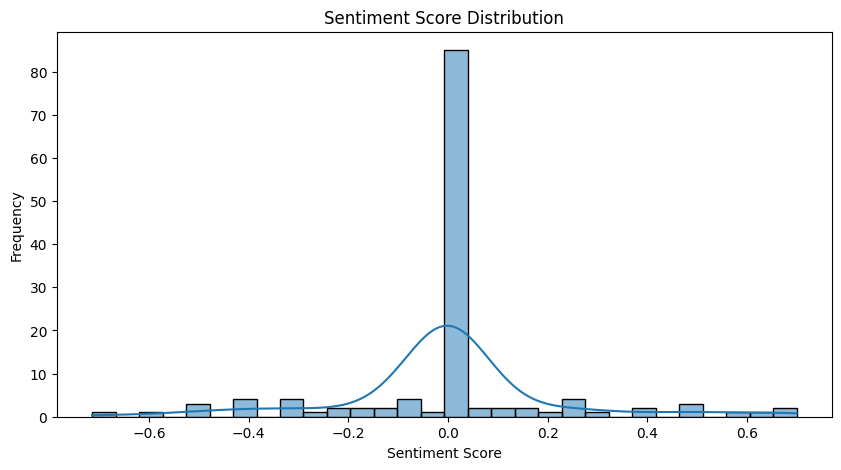

In [58]:
def get_sentiment(text):
    if isinstance(text, list):
        text = " ".join(text)  # Convert list back to string
    return TextBlob(text).sentiment.polarity  # Returns value between -1 (negative) and +1 (positive)

data["Sentiment"] = data["Tweet Text"].apply(get_sentiment)

plt.figure(figsize=(10, 5))
sns.histplot(data["Sentiment"], bins=30, kde=True)
plt.title("Sentiment Score Distribution")
plt.xlabel("Sentiment Score")
plt.ylabel("Frequency")
plt.show()

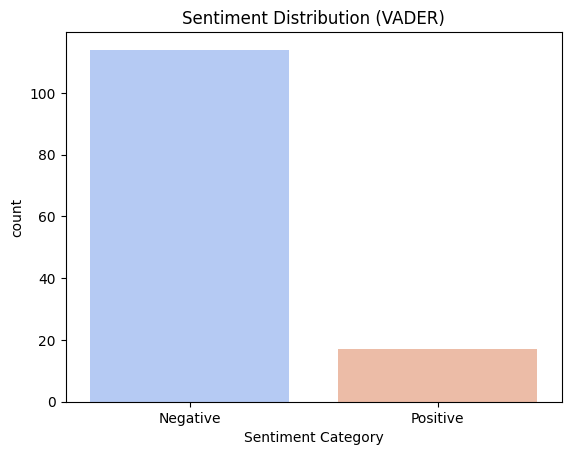

In [59]:
analyzer = SentimentIntensityAnalyzer()

def get_vader_sentiment(text):
    score = analyzer.polarity_scores(text)['compound']
    return "Positive" if score > 0 else "Negative"

data["Sentiment Category"] = data["Tweet Text"].apply(get_vader_sentiment)

# Plot
sns.countplot(x="Sentiment Category", data=data, palette="coolwarm")
plt.title("Sentiment Distribution (VADER)")
plt.show()

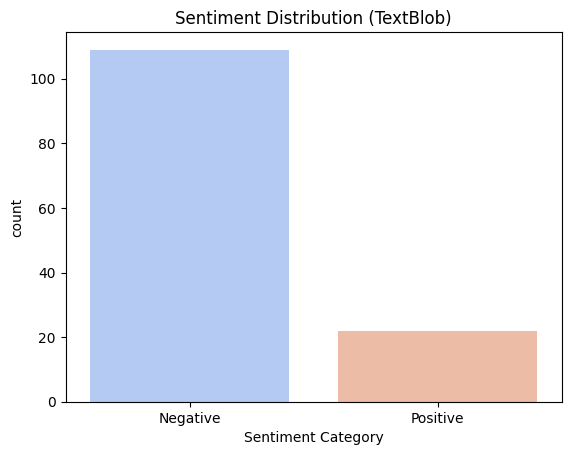

In [60]:
from textblob import TextBlob

def get_textblob_sentiment(text):
    score = TextBlob(text).sentiment.polarity
    return "Positive" if score > 0 else "Negative"

data["Sentiment Category"] = data["Tweet Text"].apply(get_textblob_sentiment)

# Plot
sns.countplot(x="Sentiment Category", data=data, palette="coolwarm")
plt.title("Sentiment Distribution (TextBlob)")
plt.show()

## 5.2 Bivariate Analysis

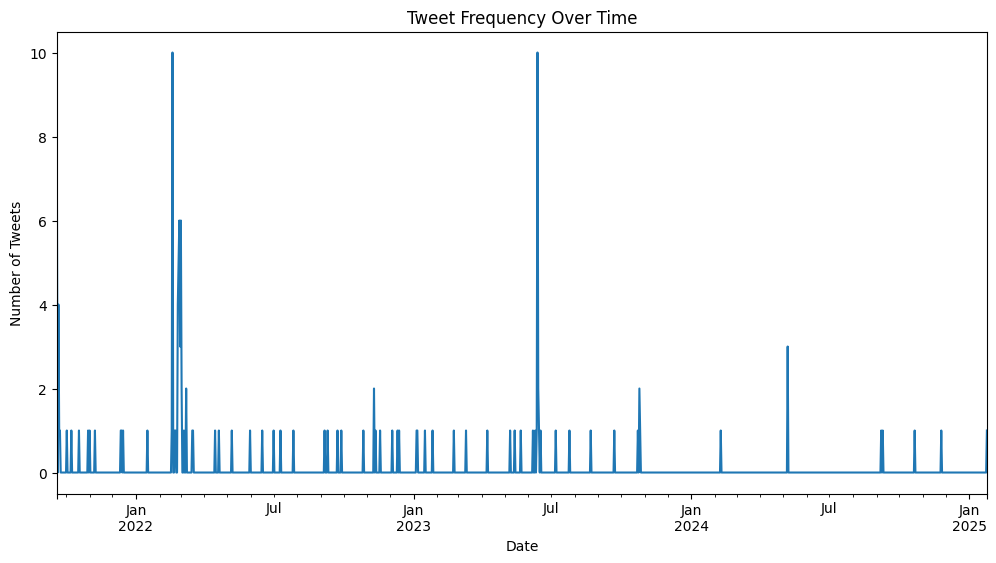

In [61]:
# Convert timestamp column (if available)
data["Date"] = pd.to_datetime(data["Date"])

# Plot tweet frequency over time
data.resample("D", on="Date").count()["Tweet Text"].plot(figsize=(12, 6), title="Tweet Frequency Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Tweets")
plt.show()

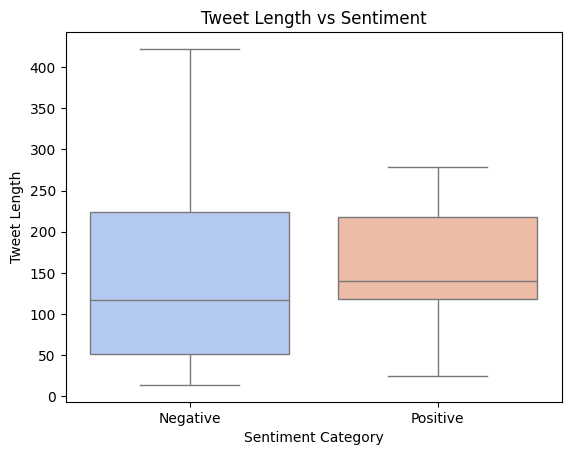

In [62]:
data["Tweet Length"] = data["Tweet Text"].apply(lambda x: len(x))

sns.boxplot(x="Sentiment Category", y="Tweet Length", data=data, palette="coolwarm")
plt.title("Tweet Length vs Sentiment")
plt.show()

## 5.3 Multivariate Analysis

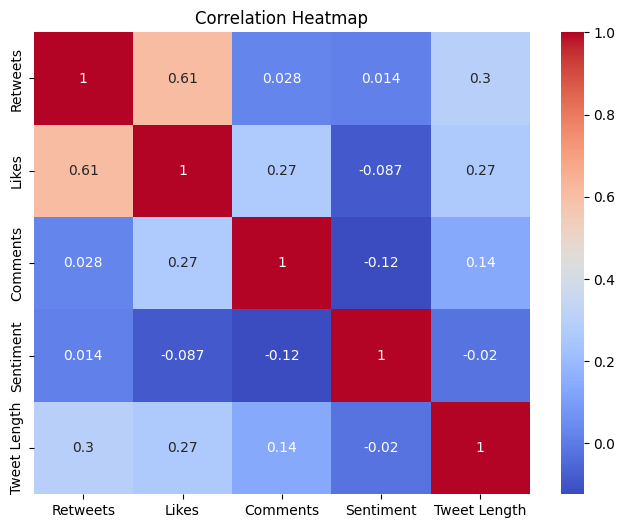

In [63]:
plt.figure(figsize=(8, 6))

# Select only numeric columns
numeric_data = data.select_dtypes(include=["number"])

# Compute and plot correlation heatmap
sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

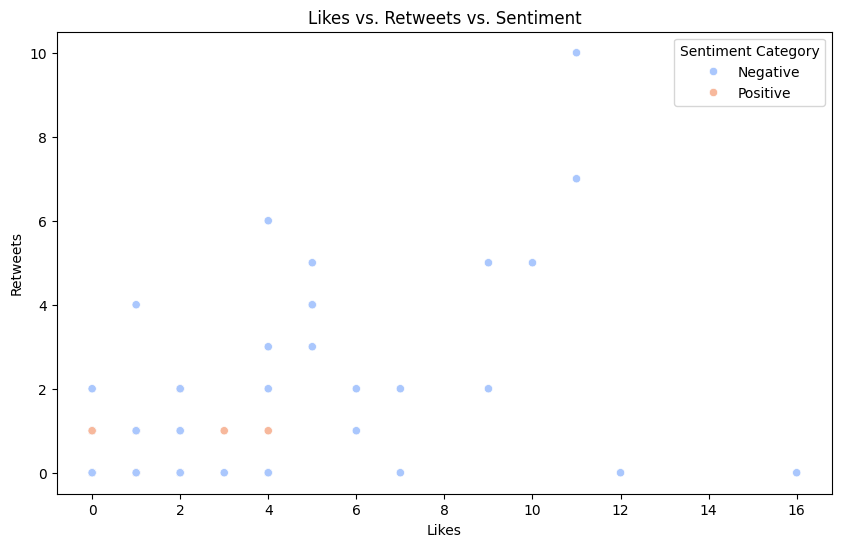

In [64]:
plt.figure(figsize=(10, 6))  # Increase figure size
sns.scatterplot(x="Likes", y="Retweets", hue="Sentiment Category", data=data, palette="coolwarm")
plt.title("Likes vs. Retweets vs. Sentiment")
plt.show()